In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
## Loading the data

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [6]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [7]:
# creating validation data and scaling data to range(0-1)

X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:] 
X_test = X_test / 255

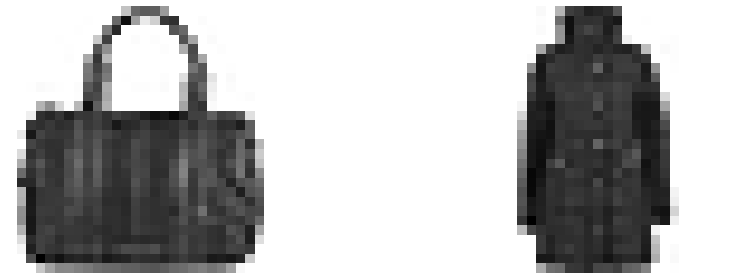

In [8]:
# Now lets take a look of some of the images into our dataset

plt.figure(figsize = (15,4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1 , 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()
        

In [9]:
y_train

array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]], class_names[y_train[1]]

('Bag', 'Coat')

In [12]:
# The validation set contains 4000 images and the test set contains 10000 images:

X_valid.shape

(4000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

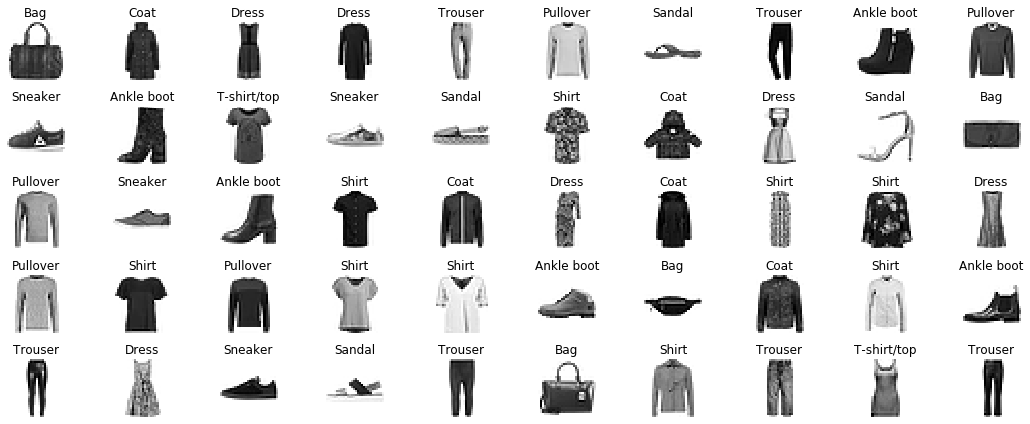

In [15]:
# Lets take a look at a sample of the images in the dataset : 

plt.figure(figsize = (15,6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5,10,plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize' : 12, 'color' : 'black'})
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [16]:
# Model Building

# building sequential model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [17]:
# summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 90,350
Trainable params: 90,350
Non-traina

In [18]:
# Compiling the Image Classification Model

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [19]:
# Training and Evalutaing the Image Classification Model
# fitting the model

model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid),
                         epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.5416 - accuracy: 0.8068 - val_loss: 53.1236 - val_accuracy: 0.8457
Epoch 2/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3832 - accuracy: 0.8593 - val_loss: 59.3678 - val_accuracy: 0.8475
Epoch 3/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3454 - accuracy: 0.8725 - val_loss: 48.9323 - val_accuracy: 0.8445
Epoch 4/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3213 - accuracy: 0.8805 - val_loss: 65.9688 - val_accuracy: 0.8342
Epoch 5/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3058 - accuracy: 0.8857 - val_loss: 46.9130 - val_accuracy: 0.8645
Epoch 6/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2909 - accuracy: 0.8913 - val_loss: 56.5958 - val_accuracy: 0.8510
Epoch 7/50
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8951 - val_loss: 47.8717 - val_ac

In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Visualizng the model

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


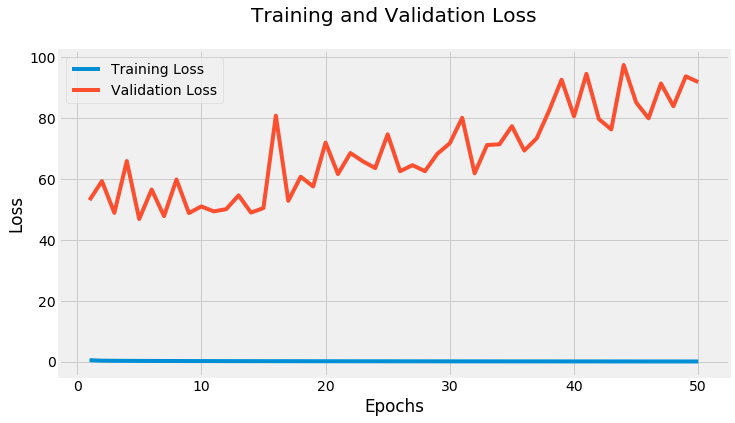

In [23]:
# Visualizing training and validation loss

plt.figure(figsize = (12,6))
plt.style.use('fivethirtyeight')

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1 , 51)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

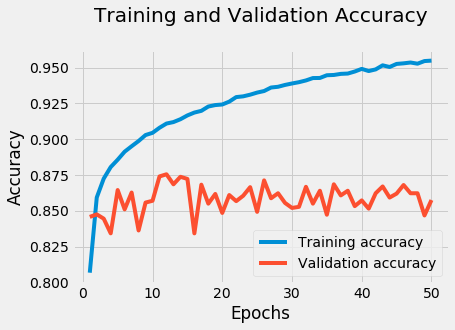

In [26]:
# Visualizing training and validation accuracy

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epoch = range(1, 51)
sns.lineplot(epoch, train_accuracy, label = 'Training accuracy')
sns.lineplot(epoch, val_accuracy, label = "Validation accuracy")
plt.title("Training and Validation Accuracy\n")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [27]:
# making predictions 

y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
       6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       6, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2], dtype=int64)

In [39]:
from tensorflow.keras.utils import plot_model


NameError: name 'plot_random_image' is not defined

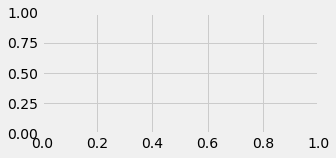

In [38]:
# Looking at some random predictions

plt.figure(figsize = (15,12))
plotnumber = 1

for i in range(15):
    if plotnumber <= 15:
        ax = plt.subplot(5,3, plotnumber)
        plot_random_image(model = model,
                         images = X_test,
                         true_labels = y_test,
                         classes = class_names)
    plotnumber += 1
    
plt.tight_layout()
plt.show()